#### Fake news detection 

#### Fake news refers to misinformation or disinformation spread through word of mouth,media or digital channels such as edited videos/pics,memes,unverified sources and social media rumours or deep fake videos. 
Fake news has become a serious problem with potential of resulting in mob violence, public shame or any kind of social stigma. Or even propaganda like favouring politicians in elections or spreading inflammatory messages of terrorists,crimes etc.

Many examples  are there in the past and currently .The problem statement dataset has been taken from kaggle Dataset :https://www.kaggle.com/pnkjgpt/fake-news-dataset

### Data science project Documentation

The Data Science Method

<b>1.Problem Identification</b>
* Identify the problem and why it is solved

<b>2.Data Wrangling</b>
* Data Collection
    - Locating the data
    - Data loading
    - Data joining
* Data Organization
    - File structure
    - Git & Github
* Data Definition
    * Column names
    - Data types (numeric, categorical, timestamp, etc.)
    - Description of the columns
    - Count or percent per unique values or codes (including NA)
    - The range of values or codes
* Data Cleaning
    * NA or missing data
    - Duplicates

<b>3.Exploratory Data Analysis</b>

- Build data profile tables and plots
- Outliers & Anomalies
- Explore data relationships
- Identification and creation of features

<b>4.Pre-processing and Training Data Development</b>

- Create dummy or indicator features for categorical variables
- Standardize the magnitude of numeric features
- Split into testing and training datasets
- Apply scaler to the testing set

<b>5.Modeling</b>

- Fit Models with Training Data Set
- Review Model Outcomes — Iterate over additional models as needed.
- Identify the Final Model

<b>6.Documentation </b>

- Review the Results
- Present and share your findings - storytelling
- Finalize Code
- Finalize Documentation

### 1.Problem Identification
####  The problem here is to develop a model that predict whether a news is fake or real

### 2.Data Wrangling

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
#locating the dataset, directories
import os
print(os.name)
print(os.getcwd())
print(os.listdir())

nt
C:\Users\Sanjay\3datascienceprojects\datascienceprojects\NLP\Fake News\fake_news_detection\notebooks
['.gitkeep', '.ipynb_checkpoints', 'concepts', 'Fake News detection.ipynb', 'fakenews2.ipynb', 'fake_news_train_data_eda.html', 'pipeline.sav']


In [3]:
data_set_path =("C:/Users/Sanjay/3datascienceprojects/datascienceprojects/NLP/Fake News/fake_news_detection/data/raw/")
df= pd.read_csv(data_set_path+"train.csv")

In [4]:
df.head()

,index,title,text,subject,date,class,Unnamed: 6
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake,NaN
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake,NaN
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake,NaN
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real,NaN
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real,NaN


In [5]:
df.head(2).T # visualize to transpose mode 

,0,1
index,0,1
title,PRESIDENT TRUMP Explains New “America First” R...,TERMINALLY ILL FORMER MISS WI: “Until my last ...
text,That s what we re talking about! Another campa...,How is it that Sean Hannity is the only media ...
subject,politics,politics
date,"Aug 2, 2017","Oct 4, 2016"
class,Fake,Fake
Unnamed: 6,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       40000 non-null  int64 
 1   title       40000 non-null  object
 2   text        40000 non-null  object
 3   subject     40000 non-null  object
 4   date        40000 non-null  object
 5   class       40000 non-null  object
 6   Unnamed: 6  1 non-null      object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df.describe()

,index
count,40000.00000
mean,19999.50000
std,11547.14972
min,0.00000
25%,9999.75000
50%,19999.50000
75%,29999.25000
max,39999.00000


In [8]:
df.isna().any()
#df.isnull().sum()

index         False
title         False
text          False
subject       False
date          False
class         False
Unnamed: 6     True
dtype: bool

There is no any missing values except Unnamed which is garbage data

In [9]:
df.title[0] #1st title


'PRESIDENT TRUMP Explains New “America First” RAISE Act…No More Welfare For New Immigrants, Migrants…Favors English Speaking Immigrants…Protects Jobs For Minorities, US Workers From Being Replaced And MORE! [VIDEO]'

In [10]:
for i in df['title'][0:5]:
    print(i,"\t\n")

PRESIDENT TRUMP Explains New “America First” RAISE Act…No More Welfare For New Immigrants, Migrants…Favors English Speaking Immigrants…Protects Jobs For Minorities, US Workers From Being Replaced And MORE! [VIDEO] 	

TERMINALLY ILL FORMER MISS WI: “Until my last breath, I will use this voice to tell who Mr. Trump really is” [VIDEO] 	

 Cruz Humiliated By Moderator After Lie About Presidents Not Appointing Justices In Election Year 	

Russia revels in Trump victory, looks to sanctions relief 	

Trump's bid to open U.S. monuments to development draws calls for protection 	



In [11]:
df.text[0]

'That s what we re talking about! Another campaign promise kept. No wonder the Democrats and their media allies fear President Trump. When is the last time a politician actually followed through on a promise they made to the American voters that helped them to get elected?President Trump joined two Republican senators on Wednesday to champion legislation overhauling legal immigration in America, calling for a merit-based system that would significantly cut admissions over the next decade.Speaking at the White House, the president called it  the most significant reform to our immigration system in a half century. As a candidate, I campaigned on creating a merit-based immigration system that protects U.S. workers and taxpayers, and that is why we are here today,  Trump said.He was joined by Georgia Sen. David Perdue and Arkansas Sen. Tom Cotton, the Republicans who first introduced the Reforming American Immigration for a Strong Economy, or the RAISE Act, in February. They have said the 

In [12]:
for i in df['text'][0:5]:   ###Text of dataset
    print(i,"\t\n\n")

That s what we re talking about! Another campaign promise kept. No wonder the Democrats and their media allies fear President Trump. When is the last time a politician actually followed through on a promise they made to the American voters that helped them to get elected?President Trump joined two Republican senators on Wednesday to champion legislation overhauling legal immigration in America, calling for a merit-based system that would significantly cut admissions over the next decade.Speaking at the White House, the president called it  the most significant reform to our immigration system in a half century. As a candidate, I campaigned on creating a merit-based immigration system that protects U.S. workers and taxpayers, and that is why we are here today,  Trump said.He was joined by Georgia Sen. David Perdue and Arkansas Sen. Tom Cotton, the Republicans who first introduced the Reforming American Immigration for a Strong Economy, or the RAISE Act, in February. They have said the l

In [13]:
df.nunique()

index         40000
title         35075
text          34965
subject           9
date           2389
class             3
Unnamed: 6        1
dtype: int64

In [14]:
dups_class = df.pivot_table(index = ['class'], aggfunc ='size')
dups_class

class
Fake                20886
February 5, 2017        1
Real                19113
dtype: int64

#### In Class column one dirty data is filled , so we will remove it later

In [15]:
df[df['class'] == 'February 5, 2017']

,index,title,text,subject,date,class,Unnamed: 6
504,504,Even Mitch McConnell Is Beginning To Turn On ...,Is Impeachment Next? (VIDEO),Donald Trump s Muslim ban is proving to be a l...,News,"February 5, 2017",Fake


In [16]:
#data seems shifted 
df['Unnamed: 6'].value_counts()

Fake    1
Name: Unnamed: 6, dtype: int64

In [17]:
df.columns

Index(['index', 'title', 'text', 'subject', 'date', 'class', 'Unnamed: 6'], dtype='object')

In [18]:
df.drop(columns=['index', 'Unnamed: 6'], inplace=True)

In [19]:
df

,title,text,subject,date,class
0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake
1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake
2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake
3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real
4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real
...,...,...,...,...,...
39995,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,"October 16, 2016",Real
39996,McDonald’s Manager To Hispanic Customer: ‘Can...,An employee working at a North Carolina McDona...,News,"September 13, 2017",Fake
39997,SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...,Tucker to sanctuary city supporter: how did a ...,politics,"Mar 29, 2017",Fake
39998,Robert Parry: Sorting Out the Russia Mess,Consortium News Exclusive: The U.S. mainstream...,US_News,"October 31, 2017",Fake


In [20]:
dups_sub = df.pivot_table(index = ['subject'], aggfunc ='size')
dups_sub

subject
Donald Trump s Muslim ban is proving to be a lot more difficult and a lot less constitutional than his followers hope. While two courts in a row have struck Trump down, even Mitch McConnell is seeing the writing on the wall. He said on Sunday that the Senate will not defend Trump s questionably constitutional Muslim ban.On CNN s State of the Union, McConnell was asked about a couple of Trump s latest, including Trump s defense of Russian President Vladimir Putin s record of assassinating his political enemies, to which Trump essentially shrugged his shoulders and said that the United States does it too. McConnell called Putin  a thug  and then, without a shred of irony in his voice, complained that Putin wasn t legitimately elected.The subject then turned to Trump s claim that he only lost the popular vote because more than 3 million undocumented people voted. While McConnell didn t exactly deny this baseless claim, he did say that  election fraud  wasn t significant enough to 

#### one value is of text in subject column  thats need to removed

# DROP BOTH 

In [21]:
df.subject.unique()

array(['politics', 'News', 'politicsNews', 'Government News', 'worldnews',
       'left-news', 'Middle-east', 'US_News',
       'Donald Trump s Muslim ban is proving to be a lot more difficult and a lot less constitutional than his followers hope. While two courts in a row have struck Trump down, even Mitch McConnell is seeing the writing on the wall. He said on Sunday that the Senate will not defend Trump s questionably constitutional Muslim ban.On CNN s State of the Union, McConnell was asked about a couple of Trump s latest, including Trump s defense of Russian President Vladimir Putin s record of assassinating his political enemies, to which Trump essentially shrugged his shoulders and said that the United States does it too. McConnell called Putin  a thug  and then, without a shred of irony in his voice, complained that Putin wasn t legitimately elected.The subject then turned to Trump s claim that he only lost the popular vote because more than 3 million undocumented people voted

In [22]:
df.iloc[[]]

,title,text,subject,date,class


### 3.Exploratory Data Analysis

<b>pandas profiling</b> does helps in visualizing and understanding the distribution of each variable. It generates a report with all the information easily available

The main disadvantage of pandas profiling is its use with large datasets. With the increase in the size of the data the time to generate the report also increases a lot.

In [23]:
from pandas_profiling import ProfileReport
prof_report = ProfileReport(df)
report_path='C:/Users/Sanjay/3datascienceprojects/datascienceprojects/NLP/Fake News/fake_news_detection/reports'
prof_report.to_file(output_file=report_path+'/df_eda_report.html')

In [24]:
prof_report

In [25]:
df_top50=df.copy()
plt.figure(figsize=(250,100))
plt.title('Percentage of news_subjects', fontsize=20)
df_top50.subject.value_counts().plot(kind='pie', 
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

<AxesSubplot:title={'center':'Percentage of news_subjects'}, ylabel='subject'>

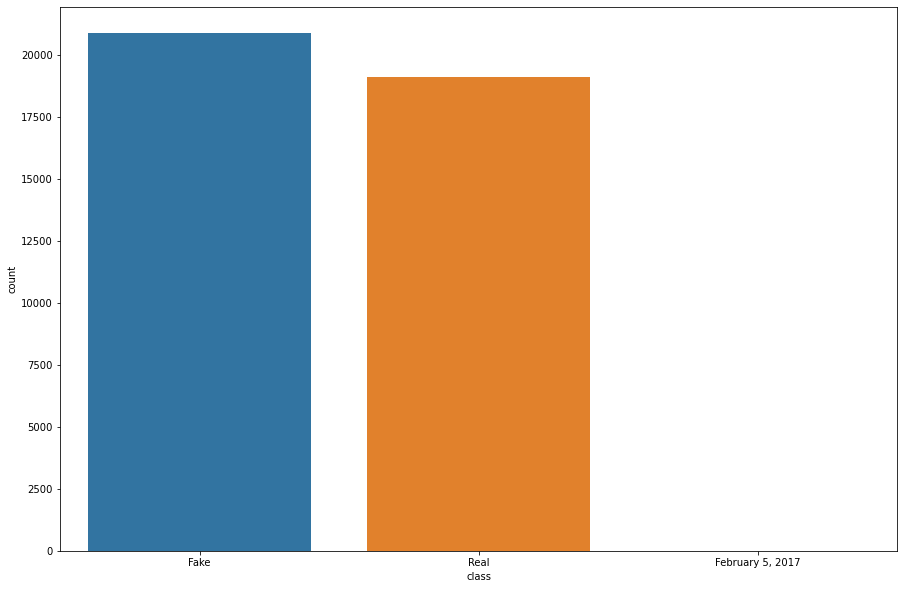

In [26]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="class",data=df)


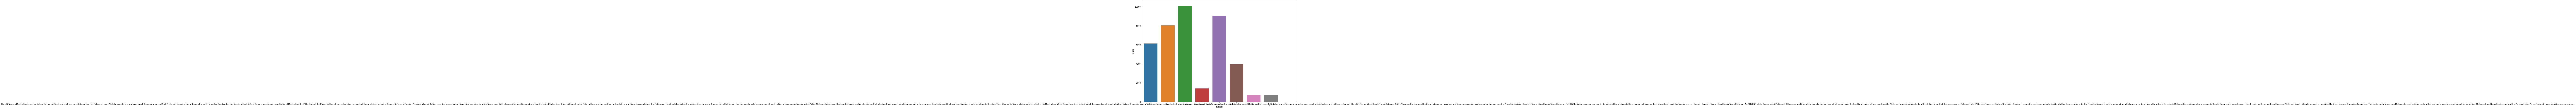

In [27]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="subject",data=df)  ##one subject is long-text so its not displaying properly

In [28]:
### fake

A countplot is great because it displays the value counts for each play in our data set

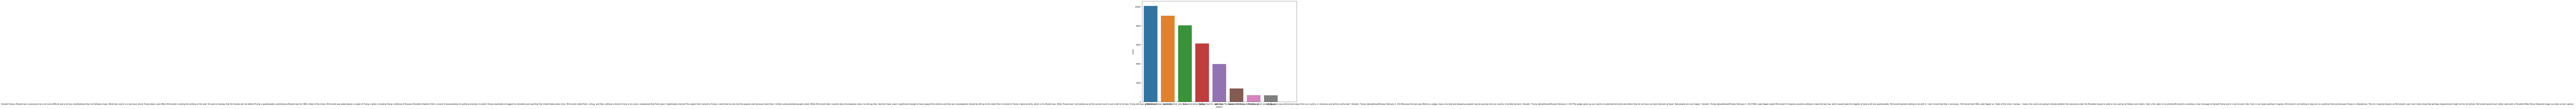

In [29]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="subject",data=df,order=df['subject'].value_counts().index)  ##one subject is long-text so its not displaying properly

- tokenize our text
- lowercase the text if the text contains alphabetic characters
- replace punctuation in the text
- remove stopwords from the text
- apply function ‘clean’ to class column

In [30]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [31]:
df_top50 =df.head(50)
df_top50.text[0]

'That s what we re talking about! Another campaign promise kept. No wonder the Democrats and their media allies fear President Trump. When is the last time a politician actually followed through on a promise they made to the American voters that helped them to get elected?President Trump joined two Republican senators on Wednesday to champion legislation overhauling legal immigration in America, calling for a merit-based system that would significantly cut admissions over the next decade.Speaking at the White House, the president called it  the most significant reform to our immigration system in a half century. As a candidate, I campaigned on creating a merit-based immigration system that protects U.S. workers and taxpayers, and that is why we are here today,  Trump said.He was joined by Georgia Sen. David Perdue and Arkansas Sen. Tom Cotton, the Republicans who first introduced the Reforming American Immigration for a Strong Economy, or the RAISE Act, in February. They have said the 

In [32]:
def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    punct = str.maketrans('','',string.punctuation)
    text =[word.translate(punct) for word in text]
    text =[word for word in text if not word in stopwords]
    return text


In [33]:
df_top50.text[2]

"Almost immediately after learning that longtime Supreme Court Justice Antonin Scalia had passed away suddenly while on a hunting trip in Texas, Sen. Ted Cruz joined his fellow Republican senators in boldly announcing that they would oppose any nomination that President Obama made and block the process for the remaining 361 days of his term.Justice Scalia was an American hero. We owe it to him, & the Nation, for the Senate to ensure that the next President names his replacement.  Ted Cruz (@tedcruz) February 13, 2016Republicans, Cruz included, were instantly greeted with a collective  what the hell are you thinking?  from the American people. The ability to appoint a Supreme Court Justice to replace one that has retired or passed away is the president s right by constitutional law. It s been this way for hundred of years. Suggesting otherwise is a violation of one of the country bedrock democratic principles.At the Republican Debate held later in the day, Cruz was asked to justify how 

In [34]:
df_top50['text'] =df_top50['text'].apply(clean)

<ipython-input-34-08e8b10ba7f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top50['text'] =df_top50['text'].apply(clean)


In [35]:
df_top50.text

0     [talking, another, campaign, promise, kept, wo...
1     [sean, hannity, media, personality, able, find...
2     [almost, immediately, learning, longtime, supr...
3     [moscow, reuters, mutual, praise, russian, pre...
4     [washington, reuters, trump, administration, c...
5     [thank, goodness, center, immigration, studies...
6     [terrified, concert, goers, fled, ariana, gran...
7     [people, regions, world, participated, best, c...
8     [detroit, reuters, list, priorities, trade, re...
9     [ankara, reuters, allegations, wrongdoing, tur...
10    [cnn, announced, would, indefinitely, banning,...
11    [reuters, european, union, states, agreed, mon...
12    [arizona, republican, senator, jeff, flake, ne...
13    [fox, news, harris, faulkner, blows, whole, ru...
14    [video, make, blood, boil, exchange, hispanic,...
15    [important, scandal, unfolding, us, many, many...
16    [routine, church, service, peter, missionary, ...
17    [beijing, reuters, china, shut, dealt, tho

In [36]:
from collections import Counter
def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg]+=1
    return cnt


txt_cnt = counter(df_top50['text'])


In [37]:
most_common_words =sorted(txt_cnt.most_common(10))  ## try to sort by no , not aliphabetical
most_common_words

[('also', 50),
 ('could', 37),
 ('north', 36),
 ('obama', 36),
 ('one', 53),
 ('people', 49),
 ('president', 46),
 ('said', 143),
 ('trump', 98),
 ('would', 59)]

<AxesSubplot:xlabel='Counts', ylabel='Words'>

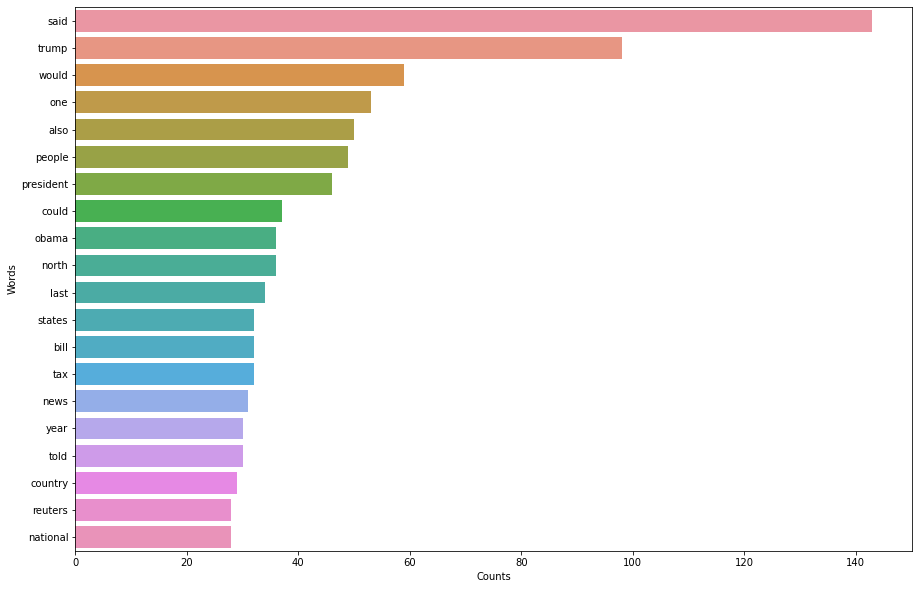

In [38]:
common_words = txt_cnt.most_common(20)
common_words = pd.DataFrame(common_words,columns=['Words','Counts'])
plt.figure(figsize=(15,10))
sns.barplot(y='Words',x='Counts',data=common_words)

In [39]:
real_words = str(df_top50['text'])

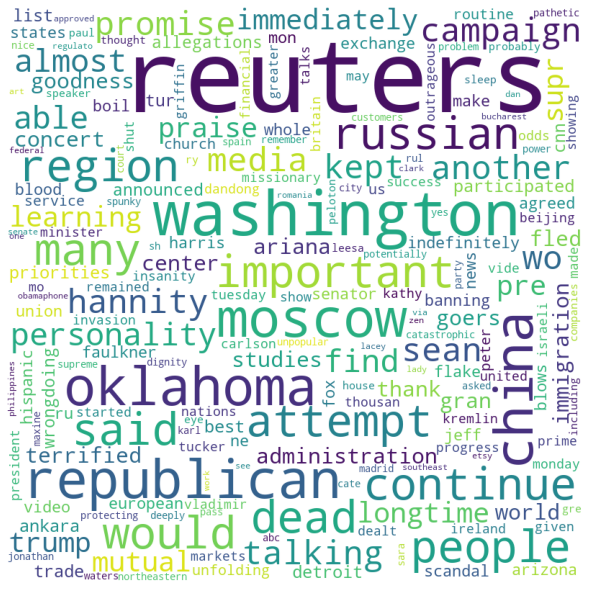

In [40]:
 #real words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
 

In [41]:
df_top50['class'].value_counts()

Fake    29
Real    21
Name: class, dtype: int64

### 4.Pre-processing and Training Data Development


In [42]:
X_train,X_test,y_train,y_test = train_test_split(df_top50['text'],df_top50['class'],test_size=0.25,random_state=7,shuffle=True)
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df =0.75)

In [43]:
vec_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
vec_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

ValueError: setting an array element with a sequence

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(vec_train,y_train)

In [ ]:
y_pred =pac.predict(vec_test)
score = accuracy_score(y_test,y_pred)
print(f'accuracy_score:{round(score*100,2)}%')

In [ ]:
confusion_matrix(y_test,y_pred,labels=['Real','Fake'])

In [ ]:
X =tfidf_vectorizer.transform(df['text'].values.astype('U'))

In [ ]:
scores = cross_val_score(pac,X,df['class'].values,cv=5)
print(f'K Fold_score:{round(scores.mean()*100,2)}%')

In [ ]:
#pwd
path='C:/Users/Sanjay/3datascienceprojects/datascienceprojects/NLP/Fake News/fake_news_detection/data/raw/archive/'

In [ ]:
df_true=pd.read_csv(path+'True.csv')
df_true['label']='Real'
df_true_rep=[df_true['text'][i].replace('WASHINGTON (Reuters) - ','').replace('LONDON (Reuters) - ','').replace('(Reuters) - ','') for i in range(len(df_true['text']))]
df_true['text']=df_true_rep
df_fake=pd.read_csv(path+'Fake.csv')
df_fake['label']='Fake'
df_final=pd.concat([df_true,df_fake])
df_final=df_final.drop(['subject','date'], axis=1)
df_fake

In [ ]:
def findlabel(newtext):
    vec_newtest=tfidf_vectorizer.transform([newtext])
    y_pred1=pac.predict(vec_newtest)
    return y_pred1[0]

In [ ]:
findlabel((df_true['text'][0]))

In [ ]:
df_true['text'][0]

In [ ]:
findlabel((df_fake['text'][0]))

In [ ]:
df_fake['text'][0]

In [ ]:
sum([1 if findlabel((df_true['text'][i]))=='Real' else 0 for i in range(len(df_true['text']))])/df_true['text'].size

In [ ]:
sum([1 if findlabel((df_fake['text'][i]))=='Fake' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size